In [32]:
import numpy as np
from numpy import random
import nest
import nest.raster_plot
import matplotlib.pyplot as plt
from matplotlib import rcParams 
import os

In [63]:
text_color = 'black' 
rcParams['text.color'] = text_color 
rcParams['axes.labelcolor'] = text_color 
rcParams['xtick.color'] = text_color 
rcParams['ytick.color'] = text_color 
plt.rc('font', size=12)          # controls default text sizes 
plt.rc('axes', titlesize=20)     # fontsize of the axes title 
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels 
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels 
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels 
plt.rc('legend', fontsize=12)    # legend fontsize 
plt.rc('figure', titlesize=26)  # fontsize of the figure title

In [66]:
def compute_itd(angle, w_head):
    v_sound = 33000 #[cm/s]
    delta_x = (w_head*np.sin(np.deg2rad(angle)))
    itd = 1000*1000*delta_x/v_sound #us
    itd = itd.astype(int) #only for spike_generators
    return itd

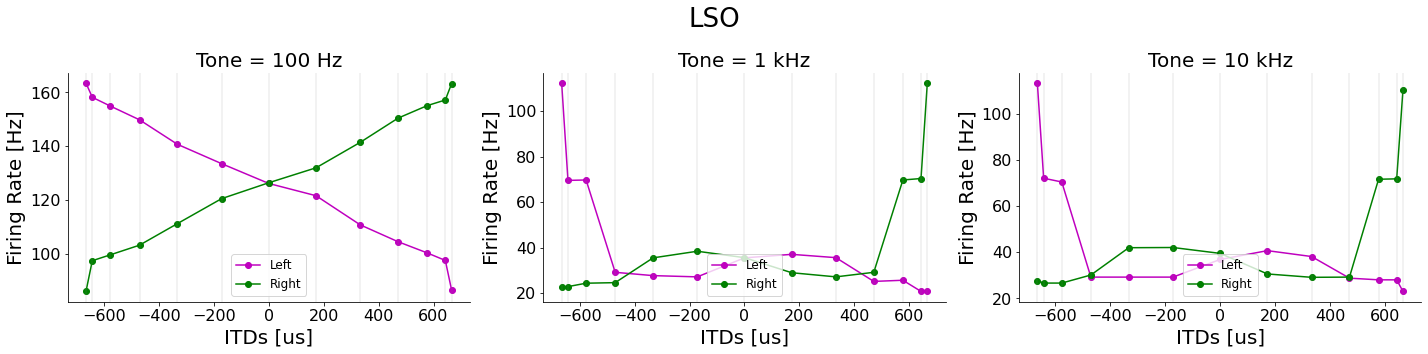

In [81]:
angles = np.arange(-90,100,15)
w_head = 22
tone = 100
delta_contra = -0.5
delta_ipsi = 0.1
angle_ax = 0
norm = 0
tones = [100,1000,10000]

fig, ax = plt.subplots(1,3, figsize=(20,5))

for j, tone in enumerate(tones):
    
    path_r_lso = '/home/ubuntu/solving_sound_loc/results/w_head = {}/r_lso_results_tone_{}'.format(w_head,tone)
    path_l_lso = '/home/ubuntu/solving_sound_loc/results/w_head = {}/l_lso_results_tone_{}'.format(w_head,tone)

    fig.suptitle("LSO")

    if(tone < 1000):
        ax[j].set_title(f"Tone = {tone} Hz")
    else:
        ax[j].set_title(f"Tone = {int(tone/1000)} kHz")

    if(angle_ax):
        x = angles
        ax[j].set_xlabel("Angle [°]")
        ax[j].set_xlabel("Angle [°]")
        ax[j].set_xticks(angles)
        ax[j].set_xticklabels(angles)
    else:
        x = compute_itd(angles,w_head)
        ax[j].set_xlabel("ITDs [us]")
    
    if(norm):
        y_r = np.loadtxt(path_r)/np.max(np.loadtxt(path_r))
        y_l = np.loadtxt(path_l)/np.max(np.loadtxt(path_l))
        ax[j].set_ylabel("Normalized Firing Rate [Hz]")
    else:
        y_r = np.loadtxt(path_r)
        y_l = np.loadtxt(path_l)
        ax[j].set_ylabel("Firing Rate [Hz]")

        ax[j].plot(x, np.loadtxt(path_l_lso), 'mo-', label = "Left")
        ax[j].plot(x, np.loadtxt(path_r_lso), 'go-', label = "Right")

        for i in range(len(x)):
            ax[j].axvline(x[i], linewidth = 0.2, color = 'grey')

    ax[j].legend(loc = 'lower center')
    ax[j].spines['top'].set_visible(False) 
    ax[j].spines['right'].set_visible(False)
    fig.tight_layout()


/tmp/ipykernel_535109/1270761245.py:27: UserWarning:FixedFormatter should only be used together with FixedLocator


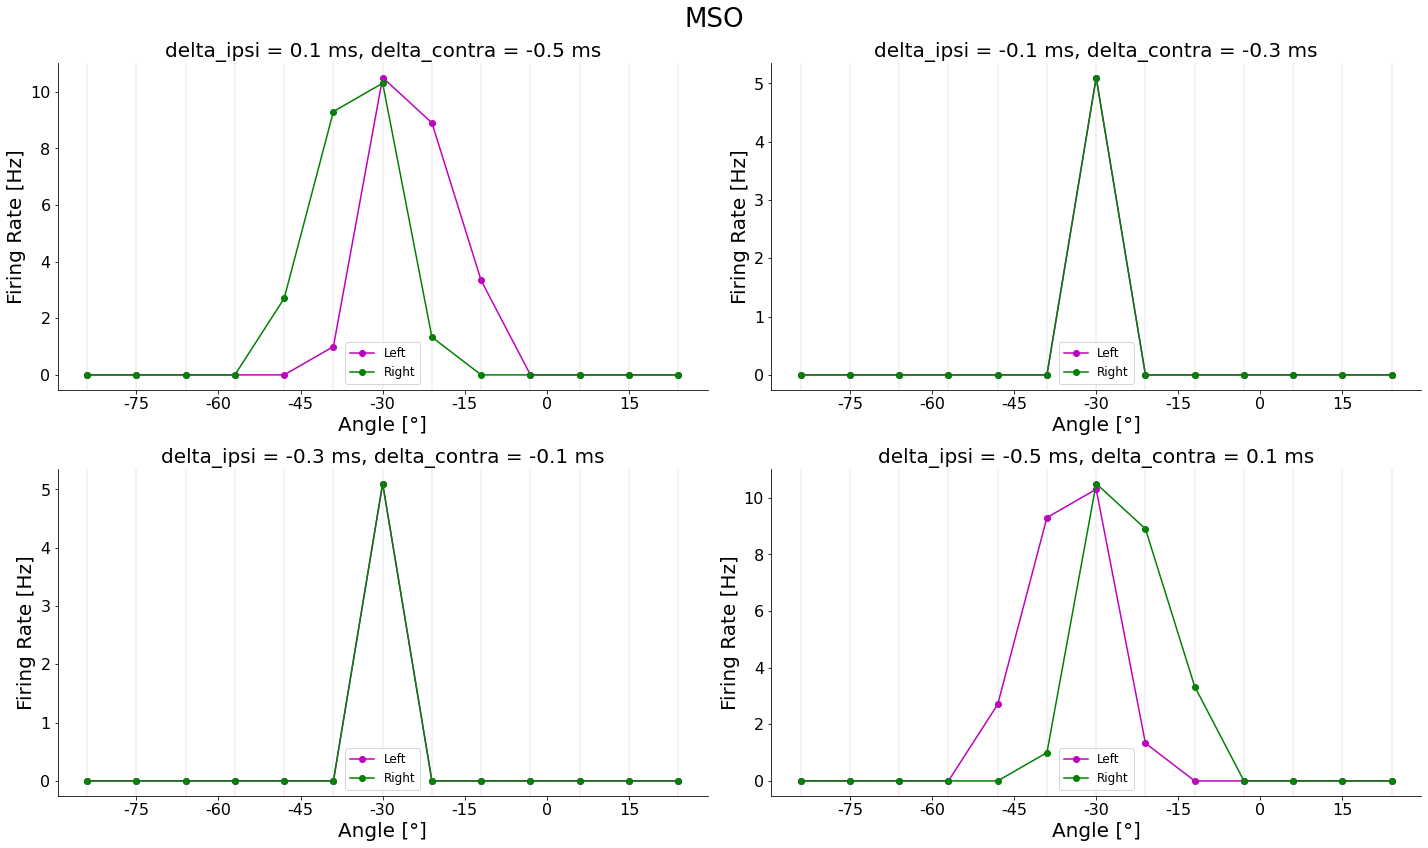

In [94]:
angles = np.arange(-90,100,15)
w_head = 22
tone = 100
#MSO cells
delta_ipsi_array = [0.1, -0.1, -0.3, -0.5]
delta_contra_array = [-0.5, -0.3, -0.1, 0.1]#np.arange(-.5,.6,.1)

angle_ax = 1
norm = 0
tone = 100

fig, ax = plt.subplots(2,2, figsize=(20,12))
ax = ax.flatten()
for j, (delta_contra, delta_ipsi) in enumerate(zip(delta_contra_array, delta_ipsi_array)):
    
    path_r = '/home/ubuntu/solving_sound_loc/results/w_head = {}/r_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}'.format(w_head,tone, delta_ipsi, delta_contra)
    path_l = '/home/ubuntu/solving_sound_loc/results/w_head = {}/l_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}'.format(w_head,tone, delta_ipsi, delta_contra)

    fig.suptitle("MSO")

    ax[j].set_title(f"delta_ipsi = {delta_ipsi} ms, delta_contra = {delta_contra} ms")


    if(angle_ax):
        x = angles
        ax[j].set_xlabel("Angle [°]")
        ax[j].set_xticklabels(angles)
    else:
        x = compute_itd(angles,w_head)
        ax[j].set_xlabel("ITDs [us]")
    
    if(norm):
        y_r = np.loadtxt(path_r)/np.max(np.loadtxt(path_r))
        y_l = np.loadtxt(path_l)/np.max(np.loadtxt(path_l))
        ax[j].set_ylabel("Normalized Firing Rate [Hz]")
    else:
        y_r = np.loadtxt(path_r)
        y_l = np.loadtxt(path_l)
        ax[j].set_ylabel("Firing Rate [Hz]")

        ax[j].plot(x, y_l,'mo-',  label = "Left")
        ax[j].plot(x, y_r,'go-', label = "Right")

        for i in range(len(x)):
            ax[j].axvline(x[i], linewidth = 0.2, color = 'grey')

    ax[j].legend(loc = 'lower center')
    ax[j].spines['top'].set_visible(False) 
    ax[j].spines['right'].set_visible(False)
    fig.tight_layout()


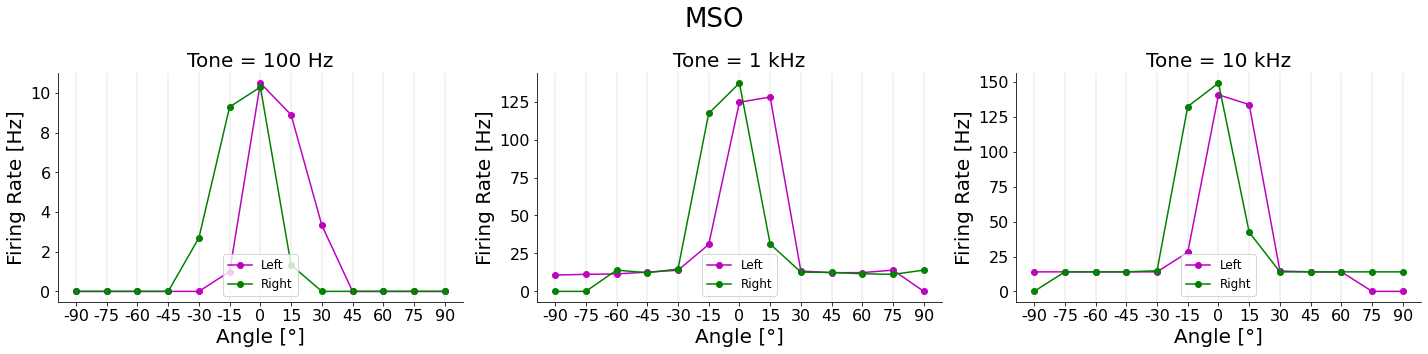

In [82]:
angles = np.arange(-90,100,15)
w_head = 22
tone = 100
delta_contra = -0.5
delta_ipsi = 0.1
angle_ax = 1
norm = 0
tones = [100,1000,10000]

fig, ax = plt.subplots(1,3, figsize=(20,5))

for j, tone in enumerate(tones):
    
    path_r = '/home/ubuntu/solving_sound_loc/results/w_head = {}/r_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}'.format(w_head,tone, delta_ipsi, delta_contra)
    path_l = '/home/ubuntu/solving_sound_loc/results/w_head = {}/l_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}'.format(w_head,tone, delta_ipsi, delta_contra)

    fig.suptitle("MSO")

    if(tone < 1000):
        ax[j].set_title(f"Tone = {tone} Hz")
    else:
        ax[j].set_title(f"Tone = {int(tone/1000)} kHz")

    if(angle_ax):
        x = angles
        ax[j].set_xlabel("Angle [°]")
        ax[j].set_xlabel("Angle [°]")
        ax[j].set_xticks(angles)
        ax[j].set_xticklabels(angles)
    else:
        x = compute_itd(angles,w_head)
        ax[j].set_xlabel("ITDs [us]")
    
    if(norm):
        y_r = np.loadtxt(path_r)/np.max(np.loadtxt(path_r))
        y_l = np.loadtxt(path_l)/np.max(np.loadtxt(path_l))
        ax[j].set_ylabel("Normalized Firing Rate [Hz]")
    else:
        y_r = np.loadtxt(path_r)
        y_l = np.loadtxt(path_l)
        ax[j].set_ylabel("Firing Rate [Hz]")

        ax[j].plot(x, y_l,'mo-',  label = "Left")
        ax[j].plot(x, y_r,'go-', label = "Right")

        for i in range(len(x)):
            ax[j].axvline(x[i], linewidth = 0.2, color = 'grey')

    ax[j].legend(loc = 'lower center')
    ax[j].spines['top'].set_visible(False) 
    ax[j].spines['right'].set_visible(False)
    fig.tight_layout()


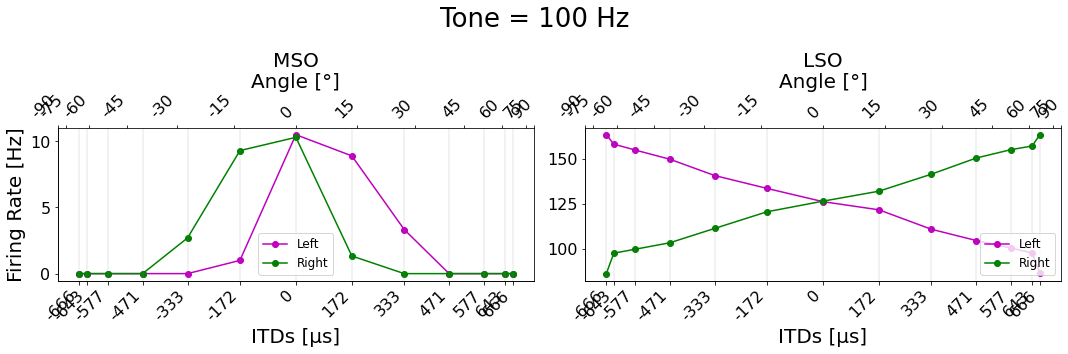

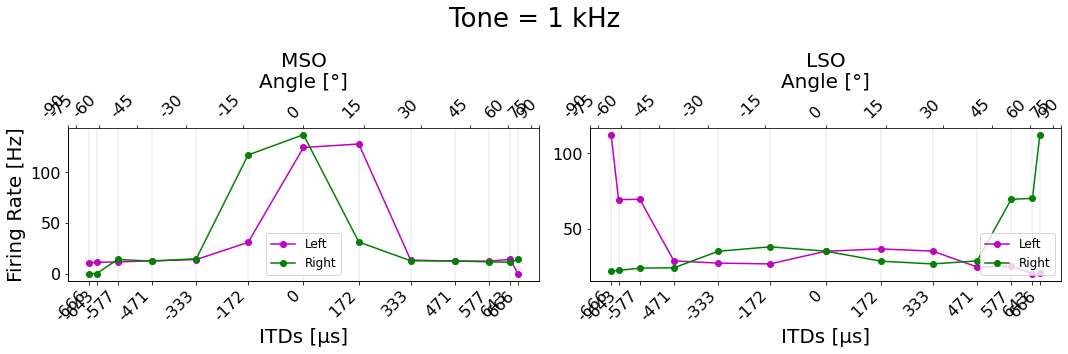

In [70]:
# Assuming `compute_itd()` is defined somewhere in your code
angles = np.arange(-90, 100, 15)
w_head = 22
tone = 100
delta_contra = -0.5
delta_ipsi = 0.1
angle_ax = 0
norm = 0
tones = [100, 1000]

for j, tone in enumerate(tones):
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    path_r = f'/home/ubuntu/solving_sound_loc/results/w_head = {w_head}/r_mso_results_tone_{tone}_delta_t_ipsi_{delta_ipsi}_delta_t_contra_{delta_contra}'
    path_l = f'/home/ubuntu/solving_sound_loc/results/w_head = {w_head}/l_mso_results_tone_{tone}_delta_t_ipsi_{delta_ipsi}_delta_t_contra_{delta_contra}'
    path_r_lso = f'/home/ubuntu/solving_sound_loc/results/w_head = {w_head}/r_lso_results_tone_{tone}'
    path_l_lso = f'/home/ubuntu/solving_sound_loc/results/w_head = {w_head}/l_lso_results_tone_{tone}'

    ax[0].set_title("MSO")
    ax[1].set_title("LSO")
    
    if tone < 1000:
        fig.suptitle(f"Tone = {tone} Hz")
    else:
        fig.suptitle(f"Tone = {int(tone / 1000)} kHz")

    # Primary X-axis
    if angle_ax:
        x_primary = angles
        x_secondary = compute_itd(angles, w_head)  # Compute ITDs for secondary axis
        primary_label = "Angle [°]"
        secondary_label = "ITDs [μs]"
    else:
        x_primary = compute_itd(angles, w_head)
        x_secondary = angles  # Secondary axis as angles
        primary_label = "ITDs [μs]"
        secondary_label = "Angle [°]"

    ax[0].set_xlabel(primary_label)
    ax[1].set_xlabel(primary_label)
    ax[0].set_xticks(x_primary)
    ax[1].set_xticks(x_primary)

    # Adding top axis
    ax_top_0 = ax[0].twiny()
    ax_top_1 = ax[1].twiny()
    ax_top_0.set_xlim(ax[0].get_xlim())
    ax_top_1.set_xlim(ax[1].get_xlim())
    ax_top_0.set_xticks(x_primary)
    ax_top_1.set_xticks(x_primary)
    ax_top_0.set_xticklabels(x_secondary, rotation=45, ha='right')
    ax_top_1.set_xticklabels(x_secondary, rotation=45, ha='right')
    ax_top_0.set_xlabel(secondary_label)
    ax_top_1.set_xlabel(secondary_label)

    # Load data and normalize if required
    if norm:
        y_r = np.loadtxt(path_r) / np.max(np.loadtxt(path_r))
        y_l = np.loadtxt(path_l) / np.max(np.loadtxt(path_l))
        ax[0].set_ylabel("Normalized Firing Rate [Hz]")
    else:
        y_r = np.loadtxt(path_r)
        y_l = np.loadtxt(path_l)
        ax[0].set_ylabel("Firing Rate [Hz]")

    # Plot data
    ax[0].plot(x_primary, y_l, 'mo-', label="Left")
    ax[0].plot(x_primary, y_r, 'go-', label="Right")
    ax[1].plot(x_primary, np.loadtxt(path_l_lso), 'mo-', label="Left")
    ax[1].plot(x_primary, np.loadtxt(path_r_lso), 'go-', label="Right")

    # Add vertical grid lines with labels
    for x in x_primary:
        ax[0].axvline(x, linewidth=0.2, color='grey')
        ax[1].axvline(x, linewidth=0.2, color='grey')

    # Improve readability of the primary x-axis labels
    ax[0].set_xticklabels(x_primary, rotation=45, ha='right')
    ax[1].set_xticklabels(x_primary, rotation=45, ha='right')

    # Customize plot appearance
    ax[0].legend(loc='lower center')
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[1].legend(loc='lower right')
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


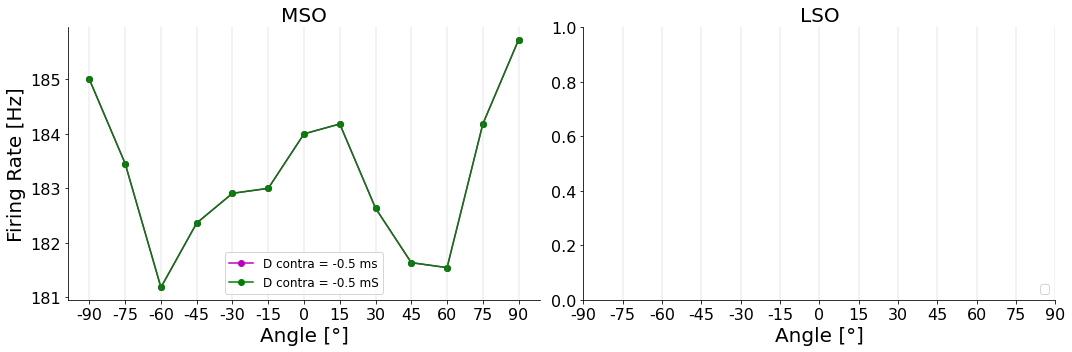

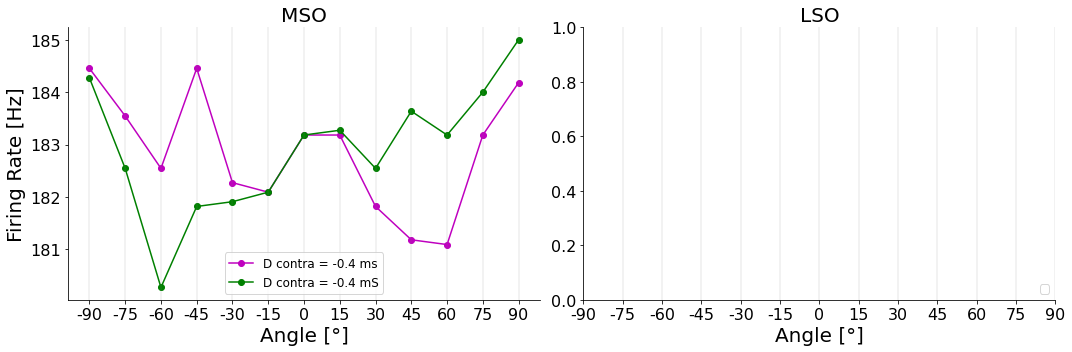

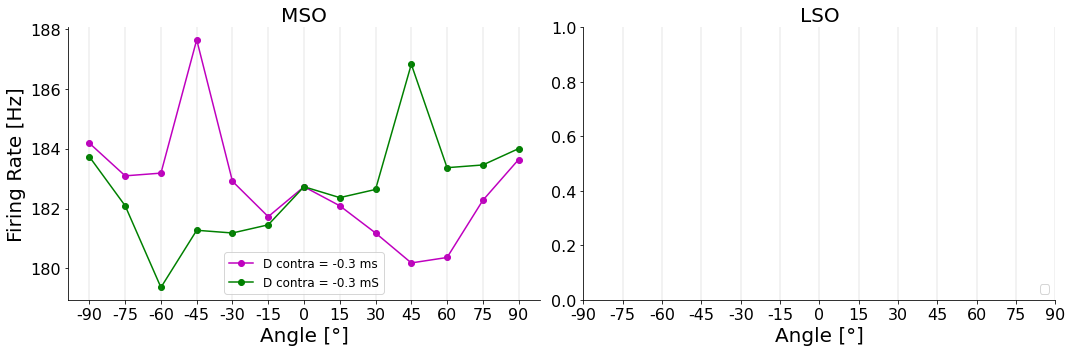

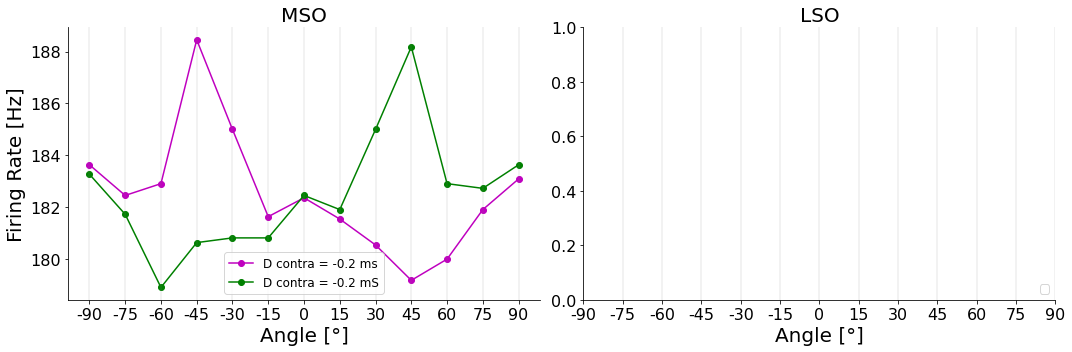

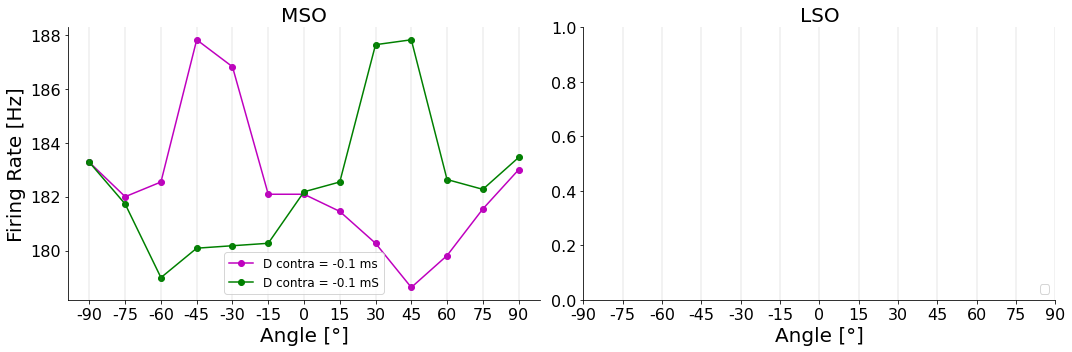

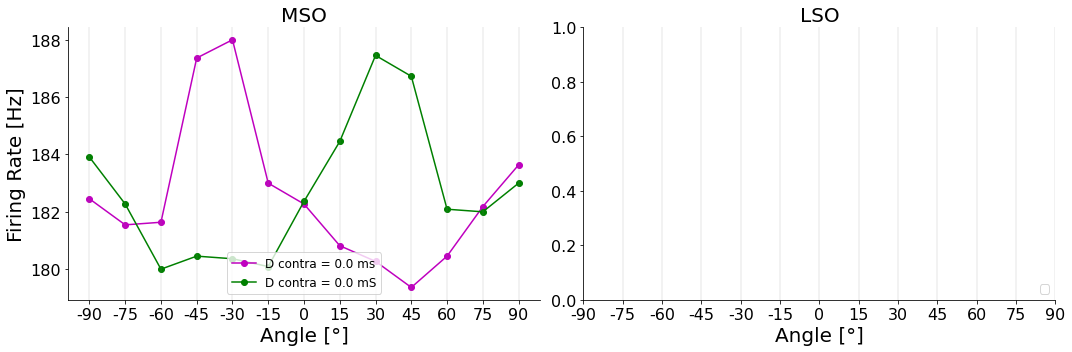

In [31]:
# Results Myoga zoom
angles = np.arange(-90,100,15)
w_head = 22
tone = 100
delta_contra_array = [-0.5,-0.4,-0.3,-0.2,-0.1,0.0]
delta_ipsi = -0.5
angle_ax = 1
norm = 0

for j, w in enumerate(delta_contra_array):
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    
    path_r = '/home/ubuntu/solving_sound_loc/results/w_head = {}/r_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}'.format(w_head,tone, delta_ipsi, w)
    path_l = '/home/ubuntu/solving_sound_loc/results/w_head = {}/l_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}'.format(w_head,tone, delta_ipsi, w)
    #path_r_lso = '/home/ubuntu/solving_sound_loc/results/w_head = {}/r_lso_results_tone_{}'.format(w_head,tone)
    #path_l_lso = '/home/ubuntu/solving_sound_loc/results/w_head = {}/l_lso_results_tone_{}'.format(w_head,tone)

    ax[0].set_title("MSO")
    ax[1].set_title("LSO")

    if(angle_ax):
        x = angles
        ax[0].set_xlabel("Angle [°]")
        ax[1].set_xlabel("Angle [°]")
        ax[0].set_xticks(angles)
        ax[0].set_xticklabels(angles)
        ax[1].set_xticks(angles)
        ax[1].set_xticklabels(angles)
    else:
        x = compute_itd(angles,w_head)
        ax[0].set_xlabel("ITDs [us]")
        ax[0].set_xticks(compute_itd(angles,4))
        ax[0].set_xticklabels(np.round(1000*compute_itd(angles,4),2))
    
    if(norm):
        y_r = np.loadtxt(path_r)/np.max(np.loadtxt(path_r))
        y_l = np.loadtxt(path_l)/np.max(np.loadtxt(path_l))
        ax[0].set_ylabel("Normalized Firing Rate [Hz]")
    else:
        y_r = np.loadtxt(path_r)
        y_l = np.loadtxt(path_l)
        ax[0].set_ylabel("Firing Rate [Hz]")

        ax[0].plot(x, y_l,'mo-', label = "D contra = {} ms".format(w))
        ax[0].plot(x, y_r,'go-', label = "D contra = {} mS".format(w))
        #ax[1].plot(x, np.loadtxt(path_l_lso), 'mo-', label = "Left")
        #ax[1].plot(x, np.loadtxt(path_r_lso), 'go-', label = "Right")

        for i in range(len(angles)):
            ax[0].axvline(x[i], linewidth = 0.2, color = 'grey')
            ax[1].axvline(x[i], linewidth = 0.2, color = 'grey')

    ax[0].legend(loc = 'lower center')
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)
    ax[1].legend(loc = 'lower right')
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()


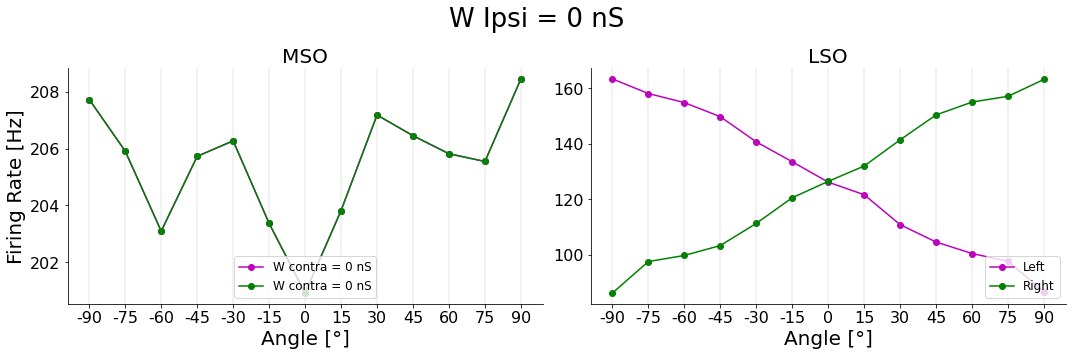

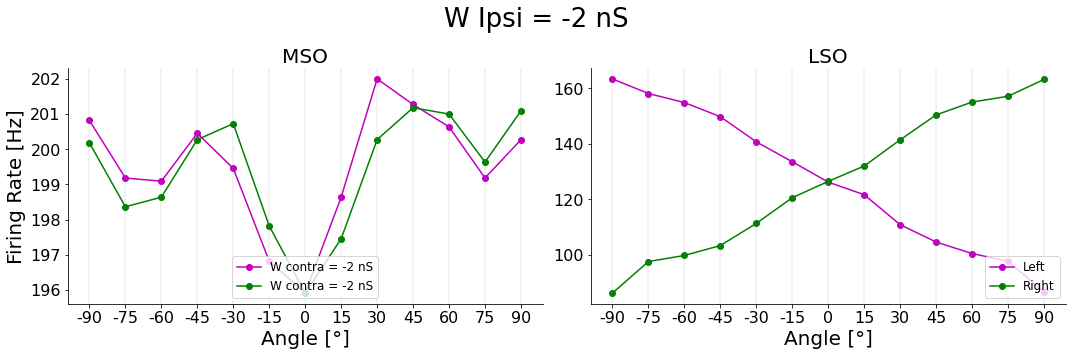

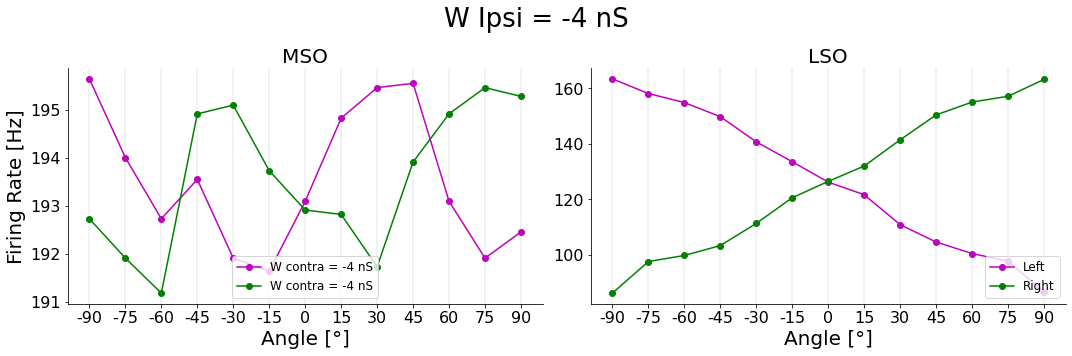

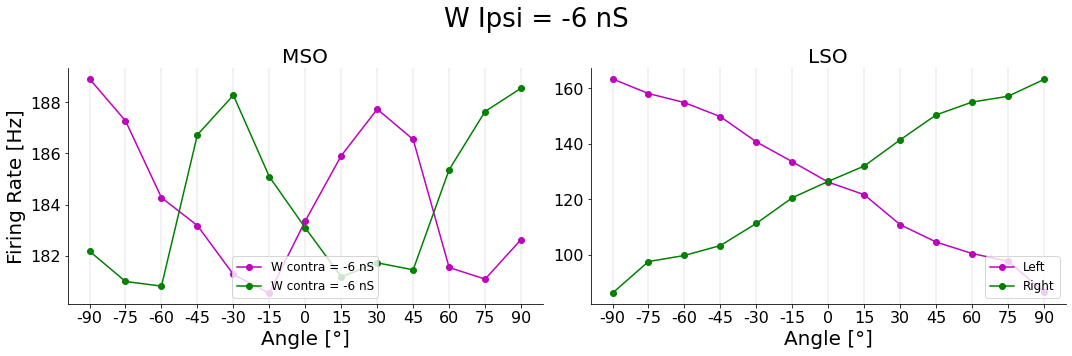

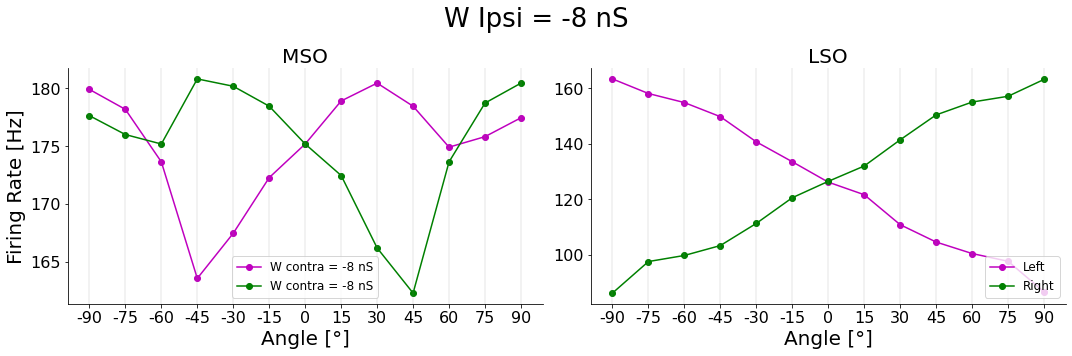

In [28]:
# Results Myoga zoom
angles = np.arange(-90,100,15)
w_head = 22
tones = [100,333,500,800]
delta_contra = -0.5
delta_ipsi = 0.1
angle_ax = 1
norm = 0
weigths = [0,-2,-4,-6,-8]

for j, w in enumerate(weigths):
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    
    path_r = '/home/ubuntu/solving_sound_loc/results/w_head = {}/r_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}_w_inh_ipsi_{}'.format(w_head,tone, delta_ipsi, delta_contra, w)
    path_l = '/home/ubuntu/solving_sound_loc/results/w_head = {}/l_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}_w_inh_ipsi_{}'.format(w_head,tone, delta_ipsi, delta_contra, w)
    path_r_lso = '/home/ubuntu/solving_sound_loc/results/w_head = {}/r_lso_results_tone_{}'.format(w_head,tone)
    path_l_lso = '/home/ubuntu/solving_sound_loc/results/w_head = {}/l_lso_results_tone_{}'.format(w_head,tone)

    ax[0].set_title("MSO")
    ax[1].set_title("LSO")

    if(angle_ax):
        x = angles
        ax[0].set_xlabel("Angle [°]")
        ax[1].set_xlabel("Angle [°]")
        ax[0].set_xticks(angles)
        ax[0].set_xticklabels(angles)
        ax[1].set_xticks(angles)
        ax[1].set_xticklabels(angles)
    else:
        x = compute_itd(angles,w_head)
        ax[0].set_xlabel("ITDs [us]")
        ax[0].set_xticks(compute_itd(angles,4))
        ax[0].set_xticklabels(np.round(1000*compute_itd(angles,4),2))
    
    if(norm):
        y_r = np.loadtxt(path_r)[j]/np.max(np.loadtxt(path_r)[j])
        y_l = np.loadtxt(path_l)[j]/np.max(np.loadtxt(path_l)[j])
        ax[0].set_ylabel("Normalized Firing Rate [Hz]")
    else:
        y_r = np.loadtxt(path_r)[j]
        y_l = np.loadtxt(path_l)[j]
        ax[0].set_ylabel("Firing Rate [Hz]")

        ax[0].plot(x, y_l,'mo-', label = "W contra = {} nS".format(weights[j]))
        ax[0].plot(x, y_r,'go-', label = "W contra = {} nS".format(weights[j]))
        ax[1].plot(x, np.loadtxt(path_l_lso), 'mo-', label = "Left")
        ax[1].plot(x, np.loadtxt(path_r_lso), 'go-', label = "Right")

        for i in range(len(angles)):
            ax[0].axvline(x[i], linewidth = 0.2, color = 'grey')
            ax[1].axvline(x[i], linewidth = 0.2, color = 'grey')

    ax[0].legend(loc = 'lower center')
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)
    ax[1].legend(loc = 'lower right')
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)

    fig.suptitle("W Ipsi = {} nS".format(w))
    fig.tight_layout()


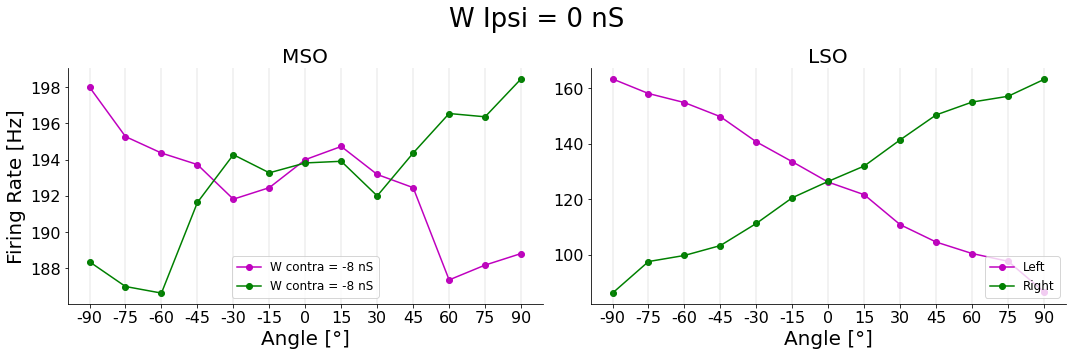

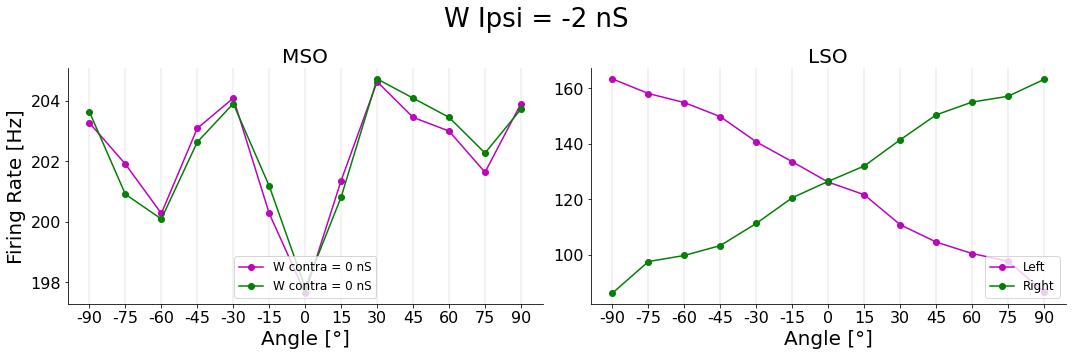

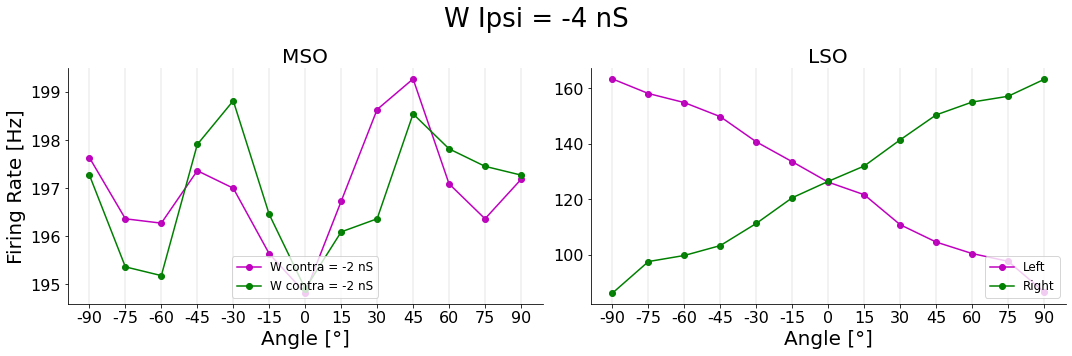

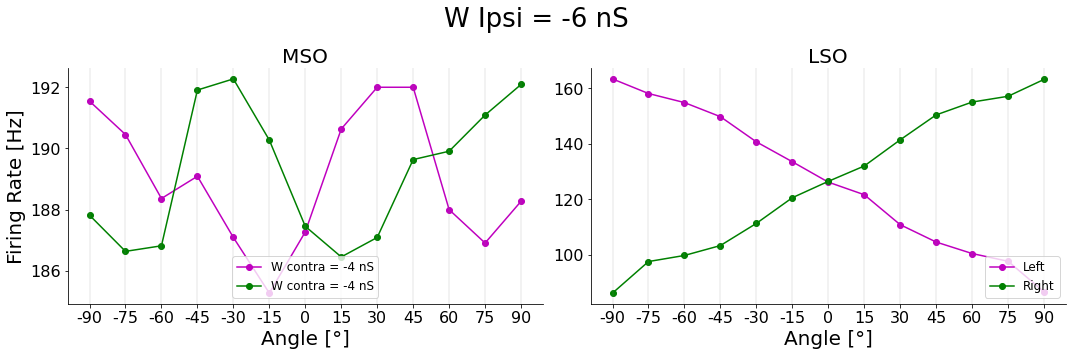

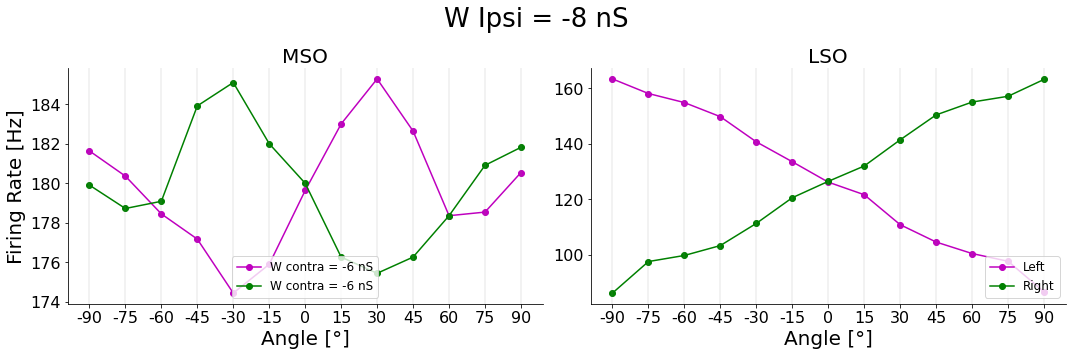

In [26]:
# Results Myoga zoom
angles = np.arange(-90,100,15)
w_head = 22
tones = [100,333,500,800]
delta_contra = -0.5
delta_ipsi = 0.1
angle_ax = 1
norm = 0
weigths = [0,-2,-4,-6,-8]

for j, w in enumerate(weigths):
    j = j-1
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    
    path_r = '/home/ubuntu/solving_sound_loc/results/w_head = {}/r_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}_w_inh_ipsi_{}'.format(w_head,tone, delta_ipsi, delta_contra, w)
    path_l = '/home/ubuntu/solving_sound_loc/results/w_head = {}/l_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}_w_inh_ipsi_{}'.format(w_head,tone, delta_ipsi, delta_contra, w)
    path_r_lso = '/home/ubuntu/solving_sound_loc/results/w_head = {}/r_lso_results_tone_{}'.format(w_head,tone)
    path_l_lso = '/home/ubuntu/solving_sound_loc/results/w_head = {}/l_lso_results_tone_{}'.format(w_head,tone)

    ax[0].set_title("MSO")
    ax[1].set_title("LSO")

    if(angle_ax):
        x = angles
        ax[0].set_xlabel("Angle [°]")
        ax[1].set_xlabel("Angle [°]")
        ax[0].set_xticks(angles)
        ax[0].set_xticklabels(angles)
        ax[1].set_xticks(angles)
        ax[1].set_xticklabels(angles)
    else:
        x = compute_itd(angles,w_head)
        ax[0].set_xlabel("ITDs [us]")
        ax[0].set_xticks(compute_itd(angles,4))
        ax[0].set_xticklabels(np.round(1000*compute_itd(angles,4),2))
    
    if(norm):
        y_r = np.loadtxt(path_r)[j]/np.max(np.loadtxt(path_r)[j])
        y_l = np.loadtxt(path_l)[j]/np.max(np.loadtxt(path_l)[j])
        ax[0].set_ylabel("Normalized Firing Rate [Hz]")
    else:
        y_r = np.loadtxt(path_r)[j]
        y_l = np.loadtxt(path_l)[j]
        ax[0].set_ylabel("Firing Rate [Hz]")

        ax[0].plot(x, y_l,'mo-', label = "W contra = {} nS".format(weights[j]))
        ax[0].plot(x, y_r,'go-', label = "W contra = {} nS".format(weights[j]))
        ax[1].plot(x, np.loadtxt(path_l_lso), 'mo-', label = "Left")
        ax[1].plot(x, np.loadtxt(path_r_lso), 'go-', label = "Right")

        for i in range(len(angles)):
            ax[0].axvline(x[i], linewidth = 0.2, color = 'grey')
            ax[1].axvline(x[i], linewidth = 0.2, color = 'grey')

    ax[0].legend(loc = 'lower center')
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)
    ax[1].legend(loc = 'lower right')
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)

    fig.suptitle("W Ipsi = {} nS".format(w))
    fig.tight_layout()


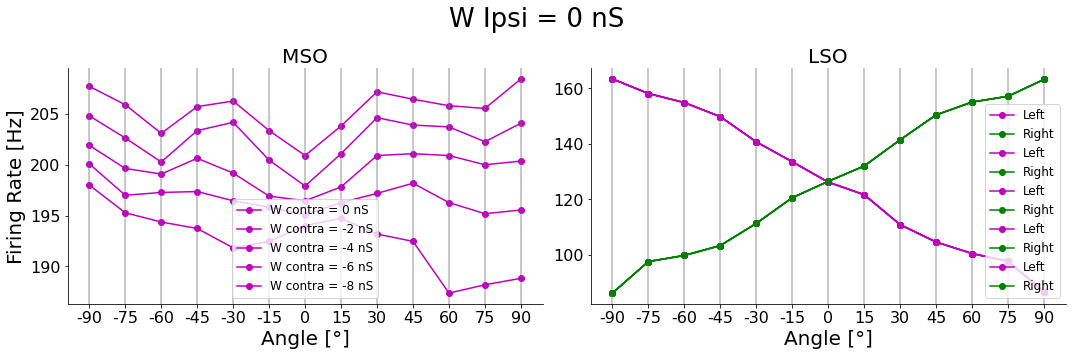

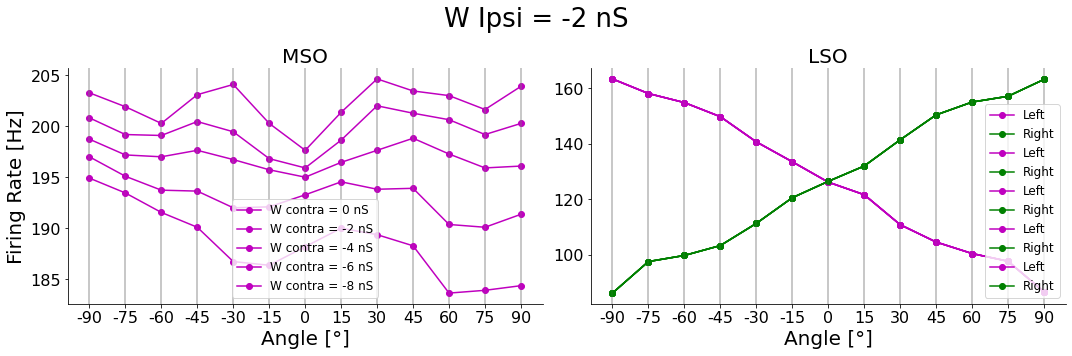

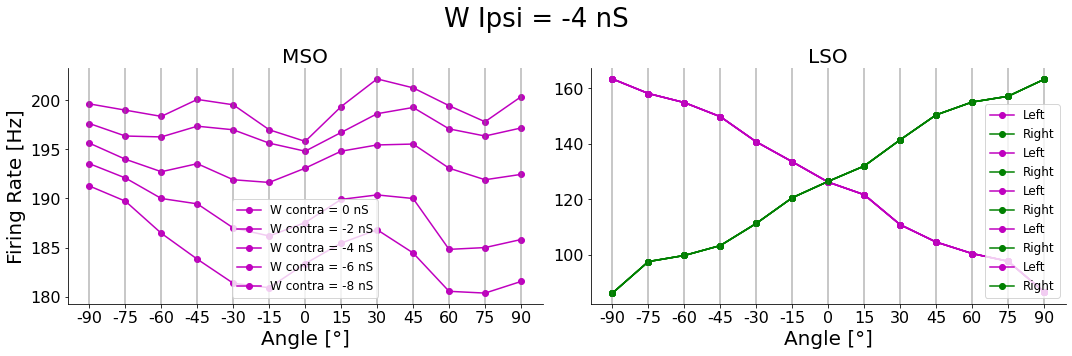

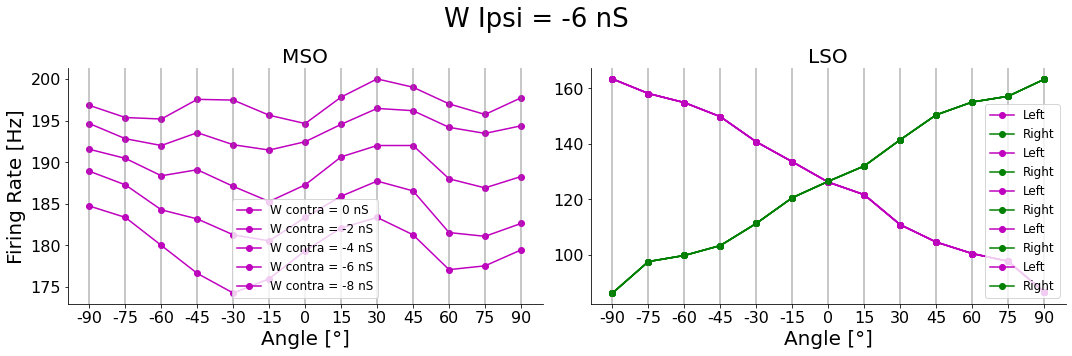

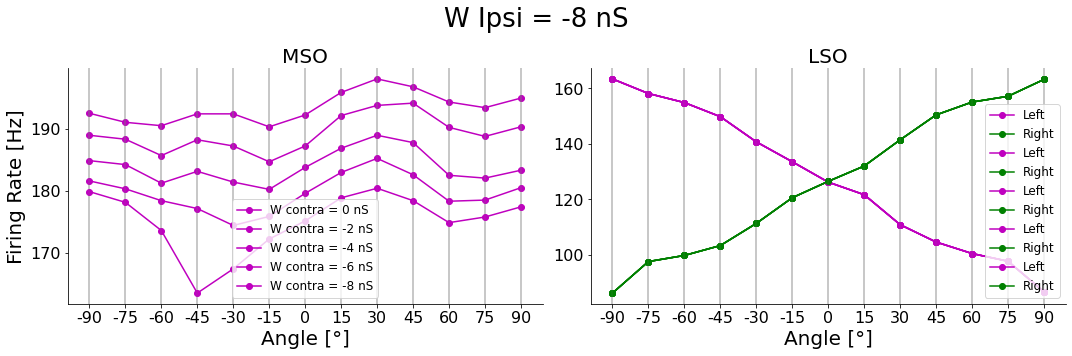

In [19]:
# Results Myoga zoom
angles = np.arange(-90,100,15)
w_head = 22
tones = [100,333,500,800]
delta_contra = -0.5
delta_ipsi = 0.1
angle_ax = 1
norm = 0
weigths = [0,-2,-4,-6,-8]

for w in weigths:
    
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    
    path_r = '/home/ubuntu/solving_sound_loc/results/w_head = {}/r_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}_w_inh_ipsi_{}'.format(w_head,tone, delta_ipsi, delta_contra, w)
    path_l = '/home/ubuntu/solving_sound_loc/results/w_head = {}/l_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}_w_inh_ipsi_{}'.format(w_head,tone, delta_ipsi, delta_contra, w)
    path_r_lso = '/home/ubuntu/solving_sound_loc/results/w_head = {}/r_lso_results_tone_{}'.format(w_head,tone)
    path_l_lso = '/home/ubuntu/solving_sound_loc/results/w_head = {}/l_lso_results_tone_{}'.format(w_head,tone)

    ax[0].set_title("MSO")
    ax[1].set_title("LSO")

    if(angle_ax):
        x = angles
        ax[0].set_xlabel("Angle [°]")
        ax[1].set_xlabel("Angle [°]")
        ax[0].set_xticks(angles)
        ax[0].set_xticklabels(angles)
        ax[1].set_xticks(angles)
        ax[1].set_xticklabels(angles)
    else:
        x = compute_itd(angles,w_head)
        ax[0].set_xlabel("ITDs [us]")
        ax[0].set_xticks(compute_itd(angles,4))
        ax[0].set_xticklabels(np.round(1000*compute_itd(angles,4),2))
    
    for j in range(5):
        if(norm):
            y_r = np.loadtxt(path_r)[j]/np.max(np.loadtxt(path_r)[j])
            y_l = np.loadtxt(path_l)[j]/np.max(np.loadtxt(path_l)[j])
            ax[0].set_ylabel("Normalized Firing Rate [Hz]")
        else:
            y_r = np.loadtxt(path_r)[j]
            y_l = np.loadtxt(path_l)[j]
            ax[0].set_ylabel("Firing Rate [Hz]")

            ax[0].plot(x, y_l,'mo-', label = "W contra = {} nS".format(weights[j]))
            #ax[0].plot(x, y_r,'go-', label = "W contra = {} nS".format(weights[j]))
            ax[1].plot(x, np.loadtxt(path_l_lso), 'mo-', label = "Left")
            ax[1].plot(x, np.loadtxt(path_r_lso), 'go-', label = "Right")

        for i in range(len(angles)):
            ax[0].axvline(x[i], linewidth = 0.2, color = 'grey')
            ax[1].axvline(x[i], linewidth = 0.2, color = 'grey')

    ax[0].legend(loc = 'lower center')
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)
    ax[1].legend(loc = 'lower right')
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)

    fig.suptitle("W Ipsi = {} nS".format(w))
    fig.tight_layout()


OSError: /home/ubuntu/solving_sound_loc/results/w_head = 22/r_mso_results_tone_100_delta_t_ipsi_0.1_delta_t_contra_-0.6_tau_exc_0.5 not found.

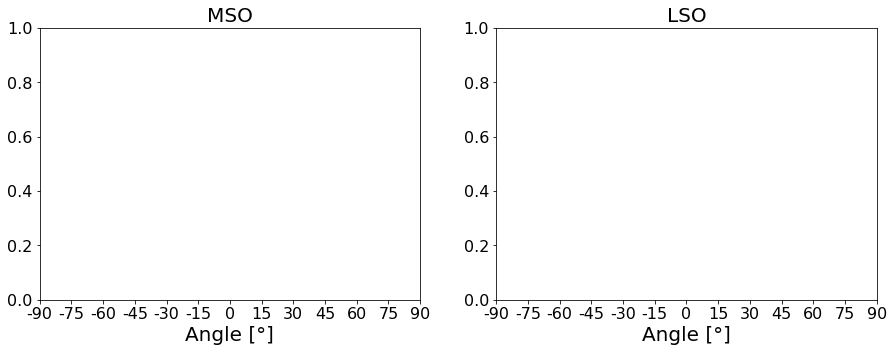

In [18]:
# Results Myoga zoom
angles = np.arange(-90,100,15)
w_head = 22
tones = [100,333,500,800]
delta_contra = -0.6
delta_ipsi = 0.1
tau = 0.5
angle_ax = 1
norm = 0

for tone in tones:
    
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    path_r = '/home/ubuntu/solving_sound_loc/results/w_head = {}/r_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}_tau_exc_{}'.format(w_head,tone, delta_ipsi, delta_contra, tau)
    path_l = '/home/ubuntu/solving_sound_loc/results/w_head = {}/l_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}_tau_exc_{}'.format(w_head,tone, delta_ipsi, delta_contra, tau)
    path_r_lso = '/home/ubuntu/solving_sound_loc/results/w_head = {}/r_lso_results_tone_{}'.format(w_head,tone)
    path_l_lso = '/home/ubuntu/solving_sound_loc/results/w_head = {}/l_lso_results_tone_{}'.format(w_head,tone)

    ax[0].set_title("MSO")
    ax[1].set_title("LSO")

    if(angle_ax):
        x = angles
        ax[0].set_xlabel("Angle [°]")
        ax[1].set_xlabel("Angle [°]")
        ax[0].set_xticks(angles)
        ax[0].set_xticklabels(angles)
        ax[1].set_xticks(angles)
        ax[1].set_xticklabels(angles)
    else:
        x = compute_itd(angles,w_head)
        ax[0].set_xlabel("ITDs [us]")
        ax[0].set_xticks(compute_itd(angles,4))
        ax[0].set_xticklabels(np.round(1000*compute_itd(angles,4),2))
        
    if(norm):
        y_r = np.loadtxt(path_r)[1]/np.max(np.loadtxt(path_r)[1])
        y_l  = np.loadtxt(path_l)[1]/np.max(np.loadtxt(path_l)[1])
        y_r0 = np.loadtxt(path_r)[0]/np.max(np.loadtxt(path_r)[0])
        y_l0  = np.loadtxt(path_l)[0]/np.max(np.loadtxt(path_l)[0])
        ax[0].set_ylabel("Normalized Firing Rate [Hz]")
    else:
        y_r = np.loadtxt(path_r)[1]
        y_l = np.loadtxt(path_l)[1]
        y_r0 = np.loadtxt(path_r)[0]
        y_l0 = np.loadtxt(path_l)[0]
        ax[0].set_ylabel("Firing Rate [Hz]")
    
    ax[0].plot(x,y_l,'mo-', label = "Left")
    ax[0].plot(x,y_r,'go-', label = "Right")
    ax[1].plot(x, np.loadtxt(path_l_lso), 'mo-', label = "Left")
    ax[1].plot(x, np.loadtxt(path_r_lso), 'go-', label = "Right")

    for i in range(len(angles)):
        ax[0].axvline(x[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(x[i], linewidth = 0.2, color = 'grey')

    ax[0].legend(loc = 'lower center')
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)
    ax[1].legend(loc = 'lower right')
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)

    fig.suptitle("Tone {} Hz".format(tone))
    fig.tight_layout()


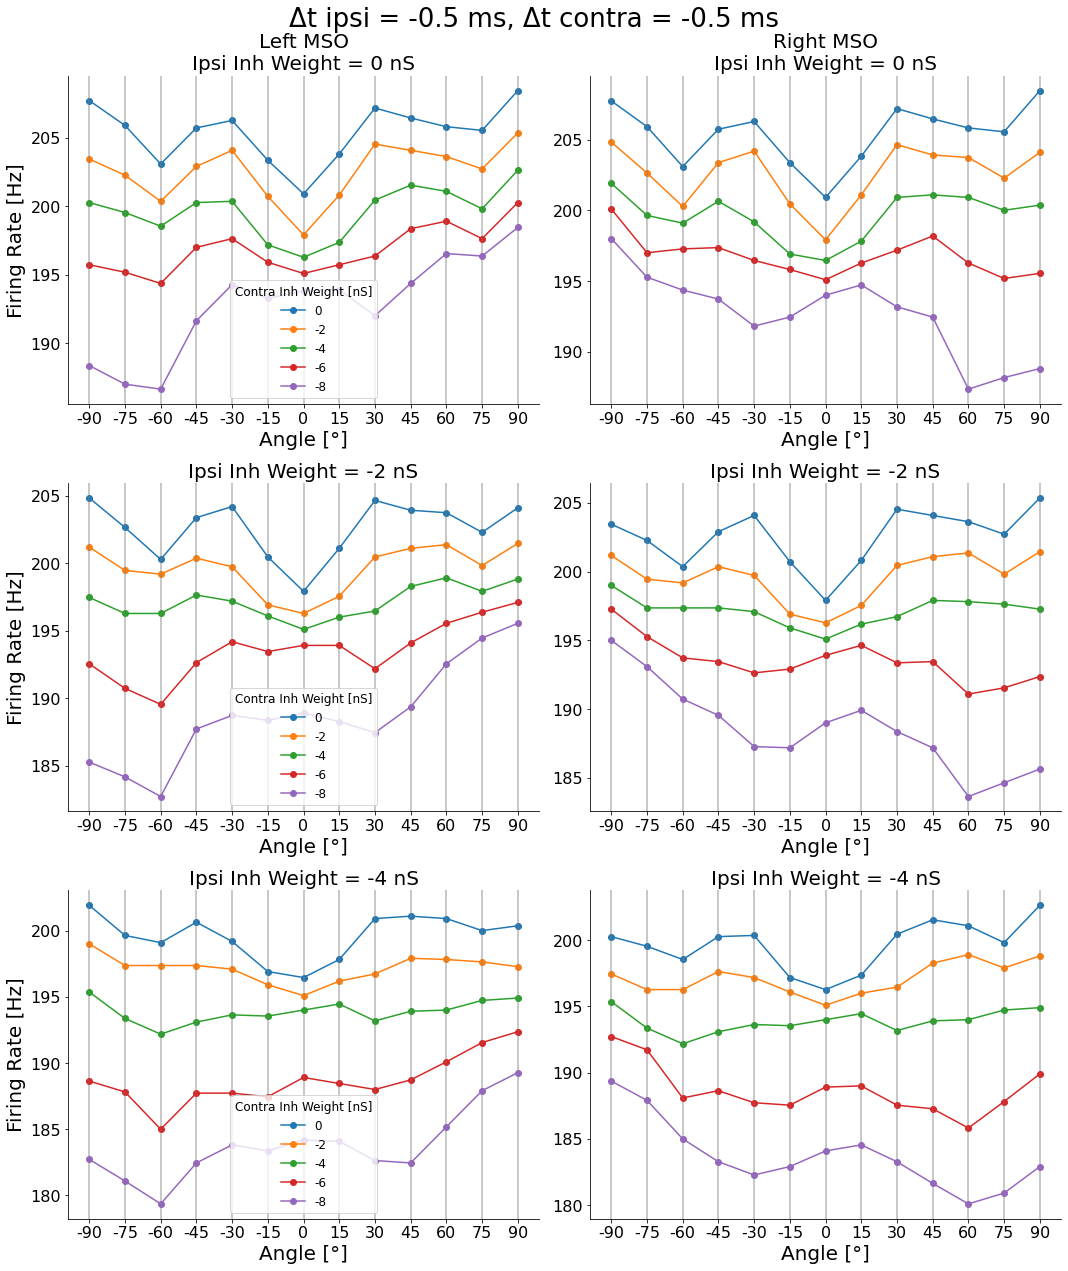

In [26]:
# Results Myoga zoom (w_head = 4)
angles = np.arange(-90,100,15)
w_head = 22
tone = 100
delta_contra = -0.5
delta_ipsi = -0.5
LTBCs2MSO_weights = [0,-2,-4]
MNTBCs2MSO_weights = [0,-2,-4,-6,-8]
tau = 0.5
angle_ax = 1
norm = 0

fig, ax = plt.subplots(len(LTBCs2MSO_weights),2, figsize=(15,18))

ax[0,0].set_title("Left MSO\nIpsi Inh Weight = {} nS".format(0))
ax[0,1].set_title("Right MSO\nIpsi Inh Weight = {} nS".format(0))

fig.suptitle("Δt ipsi = {} ms, Δt contra = {} ms".format(delta_ipsi,delta_contra))

for w in range(len(LTBCs2MSO_weights)):
    
    w_inh_ipsi = LTBCs2MSO_weights[w]

    path_r = '/home/ubuntu/solving_sound_loc/results/w_head = {}/new/r_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}_w_inh_ipsi_{}'.format(w_head,tone, delta_ipsi, delta_contra, w_inh_ipsi)
    path_l = '/home/ubuntu/solving_sound_loc/results/w_head = {}/new/l_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}_w_inh_ipsi_{}'.format(w_head,tone, delta_ipsi, delta_contra, w_inh_ipsi)
    
    if(w!=0):
        ax[w,0].set_title("Ipsi Inh Weight = {} nS".format(w_inh_ipsi))
        ax[w,1].set_title("Ipsi Inh Weight = {} nS".format(w_inh_ipsi))
    
    if(angle_ax):
        x = angles
        ax[w,0].set_xlabel("Angle [°]")
        ax[w,0].set_xticks(angles)
        ax[w,0].set_xticklabels(angles)
        ax[w,1].set_xlabel("Angle [°]")
        ax[w,1].set_xticks(angles)
        ax[w,1].set_xticklabels(angles)
    else:
        x = compute_itd(angles,w_head)
        ax[w,0].set_xlabel("ITDs [us]")
        ax[w,0].set_xticks(compute_itd(angles,4))
        ax[w,0].set_xticklabels(np.round(1000*compute_itd(angles,4),2))
        ax[w,1].set_xlabel("ITDs [us]")
        ax[w,1].set_xticks(compute_itd(angles,4))
        ax[w,1].set_xticklabels(np.round(1000*compute_itd(angles,4),2))

    for j in range(len(MNTBCs2MSO_weights)):
        if(norm):
            y_r = np.loadtxt(path_r)[j]/np.max(np.loadtxt(path_r)[j])
            y_l  = np.loadtxt(path_l)[j]/np.max(np.loadtxt(path_l)[j])
            ax[w,0].set_ylabel("Normalized Firing Rate [Hz]")
        else:
            y_r = np.loadtxt(path_r)[j]
            y_l = np.loadtxt(path_l)[j]
            ax[w,0].set_ylabel("Firing Rate [Hz]")
        ax[w,0].plot(x, y_r, 'o-', label = MNTBCs2MSO_weights[j])
        ax[w,1].plot(x, y_l, 'o-', label = MNTBCs2MSO_weights[j])

        for i in range(len(angles)):
            ax[w,0].axvline(x[i], linewidth = 0.2, color = 'grey')
            ax[w,1].axvline(x[i], linewidth = 0.2, color = 'grey')

        ax[w,0].legend(loc = 'lower center', title = "Contra Inh Weight [nS]")
        ax[w,0].legend(loc = 'lower center', title = "Contra Inh Weight [nS]")
        ax[w,0].spines['top'].set_visible(False) 
        ax[w,0].spines['right'].set_visible(False)
        ax[w,1].spines['top'].set_visible(False) 
        ax[w,1].spines['right'].set_visible(False)

    fig.tight_layout()
